# Poisson's Perturbation Method

Let's assume a following ODE:

$$ \frac{d^2y}{dt^2} + a \frac{dy}{dt} + y + \epsilon \left( \frac{dy}{dt} \right)^3 = 0 $$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
t, epsilon, a = sp.symbols('t epsilon a')
y = sp.Function('y')(t)
y_n = n_components_of_function(y, t, n=2)
y_n

(y_0(t), y_1(t))

In [3]:
y_n[0]

y_0(t)

In [4]:
y_n[1]

y_1(t)

In [5]:
differential_equation = sp.Eq(y.diff(t, 2) + a*y.diff(t) + y + epsilon*y.diff(t)**3, 0, evaluate=False)
differential_equation

Eq(a*Derivative(y(t), t) + epsilon*Derivative(y(t), t)**3 + y(t) + Derivative(y(t), (t, 2)), 0)

We assume $a = \frac{1}{2}$

In [6]:
a_value = sp.Rational(1, 2)
diff_eq = differential_equation.subs(a, a_value)
diff_eq

Eq(epsilon*Derivative(y(t), t)**3 + y(t) + Derivative(y(t), t)/2 + Derivative(y(t), (t, 2)), 0)

In [7]:
P = orders_of_perturbation(y_n, epsilon)
P

epsilon*y_1(t) + y_0(t)

Let's substitute $y(t)$ with $P$

In [8]:
diff_eq2 = diff_eq.subs(y, P)
diff_eq2

Eq(epsilon*y_1(t) + epsilon*Derivative(epsilon*y_1(t) + y_0(t), t)**3 + y_0(t) + Derivative(epsilon*y_1(t) + y_0(t), t)/2 + Derivative(epsilon*y_1(t) + y_0(t), (t, 2)), 0)

In [9]:
diff_eq2 = sp.expand(diff_eq2.doit())
diff_eq2

Eq(epsilon**4*Derivative(y_1(t), t)**3 + 3*epsilon**3*Derivative(y_0(t), t)*Derivative(y_1(t), t)**2 + 3*epsilon**2*Derivative(y_0(t), t)**2*Derivative(y_1(t), t) + epsilon*y_1(t) + epsilon*Derivative(y_0(t), t)**3 + epsilon*Derivative(y_1(t), t)/2 + epsilon*Derivative(y_1(t), (t, 2)) + y_0(t) + Derivative(y_0(t), t)/2 + Derivative(y_0(t), (t, 2)), 0)

In [10]:
epsilon_expansion = sp.collect(diff_eq2.lhs, epsilon)
epsilon_expansion

epsilon**4*Derivative(y_1(t), t)**3 + 3*epsilon**3*Derivative(y_0(t), t)*Derivative(y_1(t), t)**2 + 3*epsilon**2*Derivative(y_0(t), t)**2*Derivative(y_1(t), t) + epsilon*(y_1(t) + Derivative(y_0(t), t)**3 + Derivative(y_1(t), t)/2 + Derivative(y_1(t), (t, 2))) + y_0(t) + Derivative(y_0(t), t)/2 + Derivative(y_0(t), (t, 2))

Now we extract terms which are free of $\epsilon$, to get zeroth expansion

In [11]:
eq0 = sp.Eq(epsilon_expansion.coeff(epsilon, 0), 0)
eq0

Eq(y_0(t) + Derivative(y_0(t), t)/2 + Derivative(y_0(t), (t, 2)), 0)

And now we get first order expansion (proportional to $\epsilon$)

In [12]:
eq1 = sp.Eq(epsilon_expansion.coeff(epsilon, 1), 0)
eq1

Eq(y_1(t) + Derivative(y_0(t), t)**3 + Derivative(y_1(t), t)/2 + Derivative(y_1(t), (t, 2)), 0)

Let's specify initial conditions

In [13]:
ics_y0 = {y_n[0].subs(t, 0): 1, y_n[0].diff(t).subs(t, 0): 0}

In [14]:
sol1 = sp.expand(sp.dsolve(eq0, y_n[0], ics=ics_y0))
sol1

Eq(y_0(t), sqrt(15)*exp(-t/4)*sin(sqrt(15)*t/4)/15 + exp(-t/4)*cos(sqrt(15)*t/4))

Now let's substitute $y_0(t)$ to eq1

In [15]:
ics_y1 = {y_n[1].subs(t, 0): 0, y_n[1].diff(t).subs(t, 0): 0}

In [16]:
sol2 = sp.dsolve(eq1, y_n[1], ics=ics_y1).doit()
sol2

Eq(y_1(t), ((4*sqrt(15)*Integral(exp(t/4)*sin(sqrt(15)*t/4)*Derivative(y_0(t), t)**3, t)/15 - 4*sqrt(15)*Integral(exp(t/4)*sin(sqrt(15)*t/4)*Derivative(y_0(t), t)**3, (t, 0))/15)*cos(sqrt(15)*t/4) + (-4*sqrt(15)*Integral(exp(t/4)*cos(sqrt(15)*t/4)*Derivative(y_0(t), t)**3, t)/15 + 4*sqrt(15)*Integral(exp(t/4)*cos(sqrt(15)*t/4)*Derivative(y_0(t), t)**3, (t, 0))/15)*sin(sqrt(15)*t/4))*exp(-t/4))

In [17]:
sol2 = sp.expand(sol2.subs(y_n[0], sol1.rhs).doit())
sol2

Eq(y_1(t), 8*sqrt(15)*exp(-t/4)*sin(sqrt(15)*t/4)/305 - 48*exp(-t/4)*cos(sqrt(15)*t/4)/61 + 616*sqrt(15)*exp(-3*t/4)*sin(sqrt(15)*t/4)**5/13725 + 256*exp(-3*t/4)*sin(sqrt(15)*t/4)**4*cos(sqrt(15)*t/4)/305 + 1696*sqrt(15)*exp(-3*t/4)*sin(sqrt(15)*t/4)**3*cos(sqrt(15)*t/4)**2/13725 + 496*exp(-3*t/4)*sin(sqrt(15)*t/4)**2*cos(sqrt(15)*t/4)**3/305 + 24*sqrt(15)*exp(-3*t/4)*sin(sqrt(15)*t/4)*cos(sqrt(15)*t/4)**4/305 + 48*exp(-3*t/4)*cos(sqrt(15)*t/4)**5/61)

In [18]:
sol = P.subs([(y_n[0], sol1.rhs), (y_n[1], sol2.rhs)])
sol

epsilon*(8*sqrt(15)*exp(-t/4)*sin(sqrt(15)*t/4)/305 - 48*exp(-t/4)*cos(sqrt(15)*t/4)/61 + 616*sqrt(15)*exp(-3*t/4)*sin(sqrt(15)*t/4)**5/13725 + 256*exp(-3*t/4)*sin(sqrt(15)*t/4)**4*cos(sqrt(15)*t/4)/305 + 1696*sqrt(15)*exp(-3*t/4)*sin(sqrt(15)*t/4)**3*cos(sqrt(15)*t/4)**2/13725 + 496*exp(-3*t/4)*sin(sqrt(15)*t/4)**2*cos(sqrt(15)*t/4)**3/305 + 24*sqrt(15)*exp(-3*t/4)*sin(sqrt(15)*t/4)*cos(sqrt(15)*t/4)**4/305 + 48*exp(-3*t/4)*cos(sqrt(15)*t/4)**5/61) + sqrt(15)*exp(-t/4)*sin(sqrt(15)*t/4)/15 + exp(-t/4)*cos(sqrt(15)*t/4)

## Plotting the solution

In [33]:
quality = 200
a, b = 0, 20
x_values = np.linspace(a, b, quality)
initial_y_yprim = [1, 0]
epsilon_values = [0.1, 0.5, 1.0]
y_analytic_list = []
y_numeric_list = []

In [34]:
for epsilon_value in epsilon_values:
    sol_with_epsilon = sol.subs(epsilon, epsilon_value).doit()
    y_values = evaluate_function(sol_with_epsilon, t, x_values)
    y_analytic_list.append(y_values)
    
    num_equation = diff_eq.subs(epsilon, epsilon_value).doit()
    x_num, y_num = solve_second_order_differential_equation(num_equation, t, y, a, b, 0, initial_y_yprim, quality)
    y_numeric_list.append(y_num)

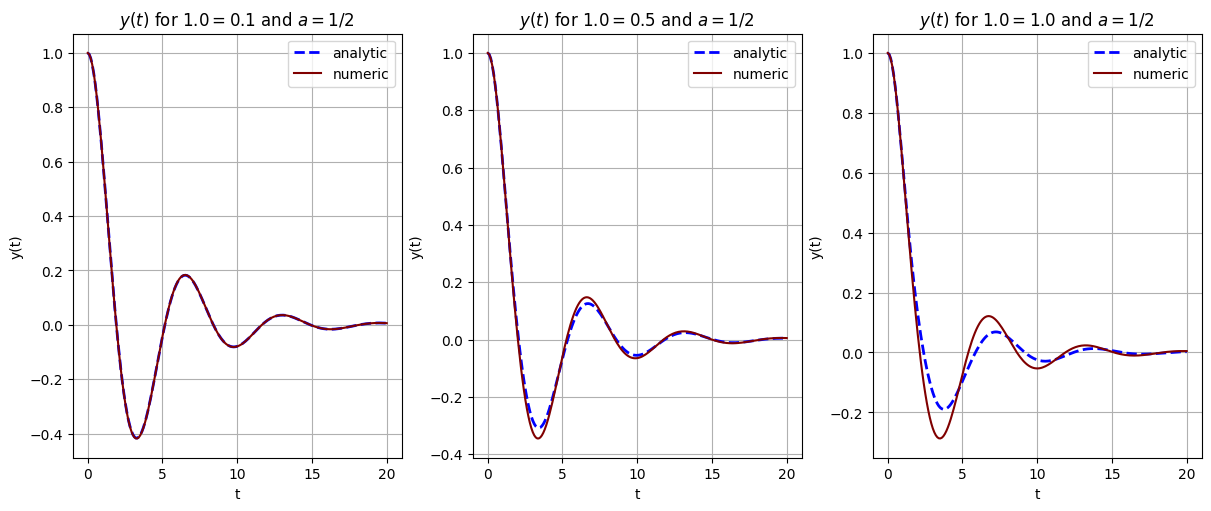

In [40]:
figure, axes = plt.subplots(1, len(epsilon_values), layout='constrained', figsize=(12, 5))
for ax, y_analytic, y_numeric, epsilon_value in zip(figure.axes, y_analytic_list, y_numeric_list, epsilon_values):
    ax.plot(x_values, y_analytic, label=f'analytic', color='blue', linewidth=2, linestyle='--')
    ax.plot(x_values, y_numeric[0], label='numeric', color='maroon')
    ax.set(title=f'$y(t)$ for ${sp.latex(epsilon)} = {sp.latex(epsilon_value)}$ and $a = {a_value}$', xlabel='t', ylabel='y(t)')
    ax.grid()
    ax.legend()